# CREATING A WEATHER CLASSIFIER THROUGH TRANSFER LEARNING

In [1]:
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

### VIEWING IMAGES 

In [2]:
cloudy = cv2.imread(r"C:\Users\Hp\OneDrive\Documents\HAFSA SHAHID\BOOTCAMP\COMPUTER VISION\Weather_Classification_Dataset\train\cloudy\cloudy14.jpg")
cloudy = cv2.cvtColor(cloudy , cv2.COLOR_BGR2RGB)

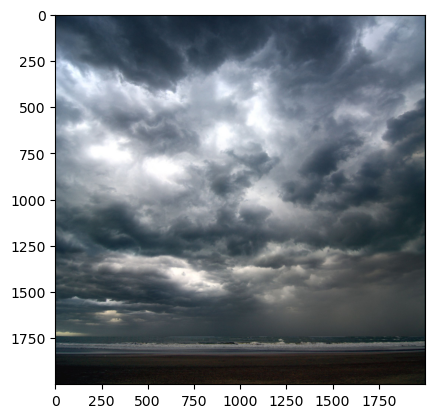

In [3]:
plt.imshow(cloudy)

In [4]:
cloudy.shape

(2000, 2000, 3)

In [5]:
sunrise = cv2.imread(r"C:\Users\Hp\OneDrive\Documents\HAFSA SHAHID\BOOTCAMP\COMPUTER VISION\Weather_Classification_Dataset\train\sunrise\sunrise50.jpg")
sunrise = cv2.cvtColor(sunrise , cv2.COLOR_BGR2RGB)

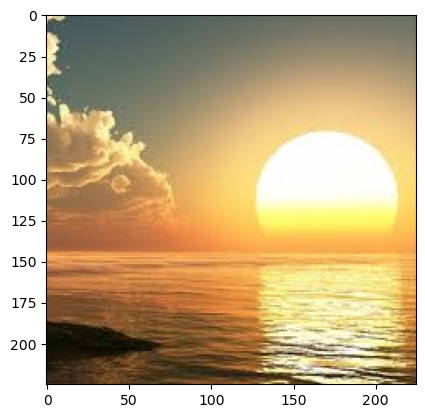

In [6]:
plt.imshow(sunrise)

In [7]:
sunrise.shape

(225, 225, 3)

### MANIPULATING IMAGES

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = (r"C:\Users\Hp\OneDrive\Documents\HAFSA SHAHID\BOOTCAMP\COMPUTER VISION\Weather_Classification_Dataset\train")

test_path = (r"C:\Users\Hp\OneDrive\Documents\HAFSA SHAHID\BOOTCAMP\COMPUTER VISION\Weather_Classification_Dataset\alien_test")

train_image_gen = ImageDataGenerator(rotation_range = 13 ,
                               width_shift_range = 0.15 ,
                               rescale = 1/255 , 
                               shear_range = 0.1 ,
                               zoom_range = 0.2 ,
                               horizontal_flip = True , 
                               fill_mode = 'nearest')
test_image_gen = ImageDataGenerator(rescale=1./255)

input_shape = (200,200,3)

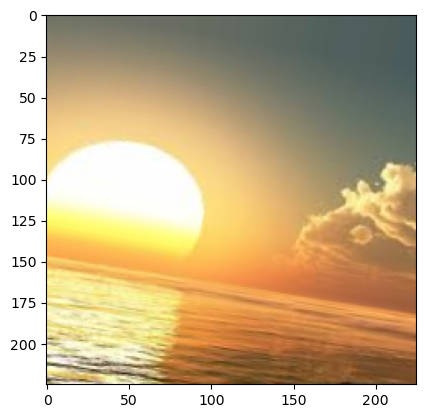

In [9]:
plt.imshow(train_image_gen.random_transform(sunrise))

### USING VGG19 AS BASE

In [10]:
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam , SGD

base_model = VGG19(weights = 'imagenet', include_top = False, input_shape = input_shape)

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

model.add(base_model)
model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

### GENERATING DESIRED IMAGES TO FEED THE MODEL

In [11]:
batch_size = 12

train_generator = train_image_gen.flow_from_directory(train_path,
                                                    target_size = input_shape[:2],
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

Found 1500 images belonging to 5 classes.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 6, 6, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 128)               2359424   
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 22384453 (85.39 MB)
Trainable params: 2360069 (9.00 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [13]:
results = model.fit_generator(train_generator , epochs = 70 , steps_per_epoch = 10 )

Epoch 1/70


10/10 [==============================] - 30s 3s/step - loss: 6.4842 - accuracy: 0.3167
Epoch 2/70
10/10 [==============================] - 28s 3s/step - loss: 1.9061 - accuracy: 0.3083
Epoch 3/70
10/10 [==============================] - 27s 3s/step - loss: 1.3106 - accuracy: 0.4167
Epoch 4/70
10/10 [==============================] - 26s 3s/step - loss: 1.2895 - accuracy: 0.5083
Epoch 5/70
10/10 [==============================] - 28s 3s/step - loss: 0.9921 - accuracy: 0.6083
Epoch 6/70
10/10 [==============================] - 27s 3s/step - loss: 1.3046 - accuracy: 0.5417
Epoch 7/70
10/10 [==============================] - 29s 3s/step - loss: 0.9903 - accuracy: 0.5833
Epoch 8/70
10/10 [==============================] - 29s 3s/step - loss: 0.8183 - accuracy: 0.6833
Epoch 9/70
10/10 [==============================] - 27s 3s/step - loss: 0.7604 - accuracy: 0.7417
Epoch 10/70
10/10 [==============================] - 28s 3s/step - loss: 1.0219 - accuracy: 0.6083
Epoch 11/70
10/10

### TESTING THE MODEL

In [14]:
train_generator.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

In [15]:
import numpy as np
from keras.preprocessing import image

picture = r"C:\Users\Hp\OneDrive\Documents\HAFSA SHAHID\BOOTCAMP\COMPUTER VISION\Weather_Classification_Dataset\alien_test\rain_2.png"
pic_rain = image.load_img(picture, target_size=(200,200))

pic_rain = image.img_to_array(pic_rain)

pic_rain = np.expand_dims(pic_rain, axis=0)
pic_rain = pic_rain/255

prediction_prob = model.predict(pic_rain)
print(prediction_prob)

1/1 [==============================] - 1s 634ms/step
[[1.6346028e-03 5.7402980e-03 9.9253803e-01 2.5864256e-05 6.1098937e-05]]


In [16]:
picture = r"C:\Users\Hp\OneDrive\Documents\HAFSA SHAHID\BOOTCAMP\COMPUTER VISION\Weather_Classification_Dataset\alien_test\foggy_6.jpg"
pic_fog = image.load_img(picture, target_size=(200,200))

pic_fog = image.img_to_array(pic_fog)

pic_fog = np.expand_dims(pic_fog, axis=0)
pic_fog = pic_rain/255

prediction_prob = model.predict(pic_fog)
print(prediction_prob)

1/1 [==============================] - 0s 205ms/step
[[3.8539473e-02 9.0770447e-01 1.4679725e-04 4.8588328e-03 4.8750464e-02]]
